# Tutorial 2: Access single-cell datasets from `scRNAseq` collection and annotate cell types

Welcome to this tutorial on annotating single-cell datasets with reference collections. The **scRNAseq** ([R/Bioc](https://bioconductor.org/packages/devel/data/experiment/html/scRNAseq.html), [Python](https://github.com/BiocPy/scrnaseq)) package provides access to public single-cell RNA-seq datasets for use by other Bioconductor/BiocPy packages and workflows. These datasets are stored in language-agnostic representations described in [ArtifactDB](https://github.com/artifactdb), enabling easy access to datasets and analysis results across multiple programming languages such as R and Python. We will showcase how to integrate and process single-cell datasets across languages, such as R and Python, and how to annotate cell types using reference datasets.

## Outline

In this tutorial, you will learn how to:

1. Install and set up BiocPy packages in your Python environment.
2. Explore the `scrnaseq` package and access public single-cell RNA-seq datasets.
3. Perform basic operations on `SingleCellExperiment` objects, the core data structure for single-cell data.
4. Annotate cell types using reference datasets from the `celldex` package.

## Prerequisites

Before we begin, please ensure that you have the following prerequisites installed:

- Python 3.8 or later with dependencies listed [here](https://github.com/BiocPy/BiocWorkshop2024/blob/master/requirements.txt).
- R 4.4.0 and Bioconductor packages listed [here](https://github.com/BiocPy/BiocWorkshop2024/blob/master/rpackages.R).

## Installation

Let's start by installing the required packages.

!pip install scrnaseq celldex singler

This will install the `scrnaseq`, `celldex`, `singler` packages from PyPI.

#### R
```r
BiocManager::install(c("scRNAseq", "celldex", "SingleR"), 
     repos='http://cran.us.r-project.org')
```

This will install the `scRNAseq`, `celldex`, `SingleR`, packages from Bioconductor.

## 1. Accessing and Exploring Single-Cell Datasets

Now that we have the necessary packages installed, let's explore the `scrnaseq` package and learn how to access public single-cell RNA-seq datasets. Datasets published to the `scrnaseq` package are decorated with metadata such as the study title, species, number of cells, etc., to facilitate discovery. Let's see how we can list and search for datasets.

### 1.1 List All Datasets

The `list_datasets()` function in Python or `surveyDatasets()` in R will display all available datasets published to the `scRNAseq` collection along with their metadata.

In [1]:
import scrnaseq
datasets = scrnaseq.list_datasets()
datasets[["name", "title", "version"]].head(3)

,name,title,version
0,aztekin-tail-2019,Identification of a regeneration-organizing ce...,2023-12-14
1,splicing-demonstration-2020,"[reprocessed, subset] The Mammalian Spermatoge...",2023-12-20
2,marques-brain-2016,Oligodendrocyte heterogeneity in the mouse juv...,2023-12-19


#### R
```r
suppressMessages(library(scRNAseq))
all_ds <- surveyDatasets()
head(all_ds[, c("name", "title", "version")], 3)
```

This lists all available datasets in the `scrnaseq` package and displays their names, titles, and versions.

### 1.2 Search for Datasets

You can also search for datasets based on metadata using `search_datasets()` in Python or `searchDatasets()` in R. This supports both simple text queries and complex boolean expressions.

In [2]:
import scrnaseq

pancreas_datasets = scrnaseq.search_datasets("pancreas")
pancreas_datasets[["name", "title", "version"]].head(3)

,name,title,version
0,grun-bone_marrow-2016,De Novo Prediction of Stem Cell Identity using...,2023-12-14
1,muraro-pancreas-2016,A Single-Cell Transcriptome Atlas of the Human...,2023-12-19
2,baron-pancreas-2016,A Single-Cell Transcriptomic Map of the Human ...,2023-12-14


#### R
```r
pancreas_ds <- searchDatasets("pancreas")
head(pancreas_ds[, c("name", "title", "version")], 3)
```

This R|Python code searches for datasets containing the term "pancreas" and displays their names, titles, and versions.

#### 1.2.1 Advanced Searches

For more complex searches involving boolean operations, use `define_text_query()` in Python or `defineTextQuery()` in R. Here's an example to find datasets using the mouse reference genome (`GRCm38`) and containing the words `neuro` or `pancrea`.

```{tip}
Check out the reference manual for more details and usage of these functions.
```

In [3]:
from gypsum_client import define_text_query
import scrnaseq

res = scrnaseq.search_datasets(
     define_text_query("GRCm38", field="genome")
     & (
          define_text_query("neuro%", partial=True)
          | define_text_query("pancrea%", partial=True)
     )
)
res[["name", "title", "version"]].head(3)

,name,title,version
0,grun-bone_marrow-2016,De Novo Prediction of Stem Cell Identity using...,2023-12-14
1,campbell-brain-2017,A molecular census of arcuate hypothalamus and...,2023-12-14
2,hu-cortex-2017,Dissecting cell-type composition and activity-...,2023-12-20


#### R

```r
suppressWarnings(library(gypsum))
res <- searchDatasets(
    defineTextQuery("GRCm38", field="genome") &
    (defineTextQuery("neuro%", partial=TRUE) | 
     defineTextQuery("pancrea%", partial=TRUE))
)
head(res[,c("name", "title", "version")], 3)
```

This performs a complex search to find datasets tagged as "mouse" in the reference genome field and containing the keywords "neuro" or "pancrea".

```{important}
Once a dataset is identified, always list the name and version of the dataset in your scripts for reproducibility.
```

## 2. Download dataset

After identifying a dataset of interest, use `fetch_dataset()` in Python or `fetchDataset()` in R to download the dataset. This will load the dataset as a `SingleCellExperiment` object.

```{note}
R/Bioconductor users might already be familiar with the [SingleCellExperiment](https://bioconductor.org/packages/release/bioc/html/SingleCellExperiment.html) class. BiocPy also provides the same implementation in the [singlecellexperiment](https://github.com/BiocPy/SingleCellExperiment) package.
```

For this tutorial, let's download the `zeisel-brain` dataset:

In [4]:
import scrnaseq
sce = scrnaseq.fetch_dataset("zeisel-brain-2015", "2023-12-14")
print(sce)

class: SingleCellExperiment
dimensions: (20006, 3005)
assays(1): ['counts']
row_data columns(1): ['featureType']
row_names(20006): ['Tspan12', 'Tshz1', 'Fnbp1l', ..., 'mt-Rnr2', 'mt-Rnr1', 'mt-Nd4l']
column_data columns(9): ['tissue', 'group #', 'total mRNA mol', 'well', 'sex', 'age', 'diameter', 'level1class', 'level2class']
column_names(3005): ['1772071015_C02', '1772071017_G12', '1772071017_A05', ..., '1772063068_D01', '1772066098_A12', '1772058148_F03']
main_experiment_name: gene
reduced_dims(0): []
alternative_experiments(2): ['repeat', 'ERCC']
row_pairs(0): []
column_pairs(0): []
metadata(0): 



#### R
```r
sce <- fetchDataset("zeisel-brain-2015", "2023-12-14")
sce
```

### 2.1 Side-quest on `SingleCellExperiment` in Python

The Python implementation of the `SingleCellExperiment` class adheres to Bioconductor's specification and offers similar interface and methods. Our goal is to make it simple for analysts to switch between R and Python. A key difference is the shift from functional to an object-oriented paradigm.

```{note}
For more details on the design, refer to the [BiocPy developer guide](https://github.com/BiocPy/developer_guide) or the [singlecellexperiment](https://github.com/BiocPy/SingleCellExperiment) documentation.
```

This Python code demonstrates basic operations on a `SingleCellExperiment` object, including retrieving assay names, column names, column metadata, accessing counts, and coercing to an `AnnData` object for interoperability with existing analysis ready eco-systems in Python.

In [6]:
print("assays: ", sce.get_assay_names()) # or sce.assay_names

print("column names: ", sce.get_column_names()[:10]) # or sce.column_names

print("column metadata: ", sce.get_column_data()) # or sce.column_data

print("access counts: ", sce.assays["counts"]) # or # sce.assay("counts")

assays:  ['counts']
column names:  ['1772071015_C02', '1772071017_G12', '1772071017_A05', '1772071014_B06', '1772067065_H06', '1772071017_E02', '1772067065_B07', '1772067060_B09', '1772071014_E04', '1772071015_D04']
column metadata:  BiocFrame with 3005 rows and 9 columns
                       tissue            group #     total mRNA mol               well                sex                age           diameter
                 <StringList> <ndarray[float64]> <ndarray[float64]> <ndarray[float64]> <ndarray[float64]> <ndarray[float64]> <ndarray[float64]>
1772071015_C02       sscortex                1.0            21580.0               11.0                1.0               21.0                0.0
1772071017_G12       sscortex                1.0            21748.0               95.0               -1.0               20.0               9.56
1772071017_A05       sscortex                1.0            31642.0               33.0               -1.0               20.0               11.1
       

```{note}
The package uses [delayed arrays](https://github.com/biocpy/delayedarray), to load file-backed arrays and matrices. This reduces memory usage when loading large datasets. This package provides similar functionality to the R/Bioconductor's [DelayedArray](https://www.bioconductor.org/packages/release/bioc/html/DelayedArray.html) eco-system. 
```

In [9]:
from delayedarray import to_scipy_sparse_matrix
print("counts as csr: ")
print(repr(to_scipy_sparse_matrix(sce.assays["counts"], "csc")))

counts as csr: 
<20006x3005 sparse matrix of type '<class 'numpy.uint16'>'
	with 11349080 stored elements in Compressed Sparse Column format>


or realize the entire matrix when loaded from disk,

In [10]:
sce = scrnaseq.fetch_dataset(
    "zeisel-brain-2015", "2023-12-14", 
    realize_assays=True)
print(sce)

class: SingleCellExperiment
dimensions: (20006, 3005)
assays(1): ['counts']
row_data columns(1): ['featureType']
row_names(20006): ['Tspan12', 'Tshz1', 'Fnbp1l', ..., 'mt-Rnr2', 'mt-Rnr1', 'mt-Nd4l']
column_data columns(9): ['tissue', 'group #', 'total mRNA mol', 'well', 'sex', 'age', 'diameter', 'level1class', 'level2class']
column_names(3005): ['1772071015_C02', '1772071017_G12', '1772071017_A05', ..., '1772063068_D01', '1772066098_A12', '1772058148_F03']
main_experiment_name: gene
reduced_dims(0): []
alternative_experiments(2): ['repeat', 'ERCC']
row_pairs(0): []
column_pairs(0): []
metadata(0): 



We also provide coercions to various package to take advantage of methods in the Python ecosystem, e.g. scverse and AnnData

In [11]:
print("coerce to AnnData: ", sce.to_anndata())

coerce to AnnData:  (AnnData object with n_obs × n_vars = 3005 × 20006
    obs: 'tissue', 'group #', 'total mRNA mol', 'well', 'sex', 'age', 'diameter', 'level1class', 'level2class', 'rownames'
    var: 'featureType', 'rownames'
    layers: 'counts', None)


## 3. Annotate Cell Types

We can now annotate cell types by using reference datasets and matching cells based on their expression profiles. In this tutorial, we will use [singleR](https://github.com/SingleR-inc/SingleR) in R or its Python equivalent [singler](https://github.com/BiocPy/singler).

Before running the `singler` algorithm, we need to download an appropriate reference dataset from the `celldex` package.

### 3.1 Access Reference Datasets from `celldex`

Similar to the `scRNAseq` package, the `celldex` package provides access to the collection of reference expression datasets with curated cell type labels, for use in procedures like automated annotation of single-cell data or deconvolution of bulk RNA-seq to reference datasets. These datasets are also stored in language-agnostic representations for use in downstream analyses.

```{note}
The `celldex` package is available on [R/Bioconductor](https://bioconductor.org/packages/devel/data/experiment/html/celldex.html) and [PyPI](https://github.com/BiocPy/celldex).
```

For this tutorial, let's download the [Mouse RNA-seq](https://www.immgen.org/) reference from `celldex` using `fetch_reference()` in Python or `fetchReference()` in R. This reference consists of a collection of mouse bulk RNA-seq data sets downloaded from the gene expression omnibus ([Benayoun et al. 2019](https://doi.org/10.1101/gr.240093.118)). A variety of cell types are available, again mostly from blood but also covering several other tissues.

In [12]:
import celldex

mouse_rnaseq_ref = celldex.fetch_reference(
    "mouse_rnaseq", "2024-02-26", 
    realize_assays=True)
print(mouse_rnaseq_ref)

class: SummarizedExperiment
dimensions: (21214, 358)
assays(1): ['logcounts']
row_data columns(0): []
row_names(21214): ['Xkr4', 'Rp1', 'Sox17', ..., 'MGC107098', 'LOC100039574', 'LOC100039753']
column_data columns(3): ['label.main', 'label.fine', 'label.ont']
column_names(358): ['ERR525589Aligned', 'ERR525592Aligned', 'SRR275532Aligned', ..., 'SRR1044042Aligned', 'SRR1044043Aligned', 'SRR1044044Aligned']
metadata(0): 



#### R
```r
suppressWarnings(library(celldex))
mouse_rnaseq_ref <- fetchReference("mouse_rnaseq", "2024-02-26", realize.assays=TRUE)
mouse_rnaseq_ref
```

Now, let's identify cells from the `zeisel-brain` dataset using the `mouse_rnaseq` reference dataset.

In [13]:
import singler

matches = singler.annotate_single(
    test_data=sce, 
    ref_data = mouse_rnaseq_ref,
    ref_labels = "label.main"
)

import pandas as pd

pd.Series(matches["best"]).value_counts()

/Users/kancherj/miniforge3/envs/bioc2024/lib/python3.10/site-packages/biocframe/BiocFrame.py:591: UserWarning: Setting property 'metadata' is an in-place operation, use 'set_metadata' instead
  warn(


Neurons              1704
Oligodendrocytes      844
Astrocytes            180
Endothelial cells     177
Macrophages            45
Epithelial cells       20
Microglia              18
Fibroblasts            17
Name: count, dtype: int64

#### R
```r
suppressWarnings(library(SingleR))
cell_labels <- SingleR(test = assay(sce, "counts"), ref = mouse_rnaseq_ref, labels = mouse_rnaseq_ref$label.main)

table(cell_labels$labels)
```

## 4. Analyze Single-cell RNA-seq datasets

![single-cell-methods](../assets/single-cell-space.jpg)

Aaron has implemented the single-cell methods from scran in C++. This allows us to reuse the same implementation in JS and develop applications for analyzing single-cell data ([Kana](https://github.com/kanaverse/kana)), or in Python through the [scranpy](https://github.com/BiocPy/scranpy) package. This avoids different interpretations of the analysis results by switching programming languages (Pachter et al, [The impact of package selection and versioning on single-cell RNA-seq analysis | bioRxiv](https://www.biorxiv.org/content/10.1101/2024.04.04.588111v1) )


To analyze the dataset,

In [14]:
import scranpy

results = scranpy.analyze_sce(sce)

# results is a complex object, lets explore the umap and tsne dimensions
print(results.tsne)

TsneEmbedding(x=array([23.78283174, 23.20692407, 23.99748307, ..., 16.43261279,
       12.91835402, 20.38262289]), y=array([-15.02586205, -15.00463774, -14.18924958, ...,  -1.56177656,
         1.55240304,   3.51312435]))


### 4.1 Seems like magic?

Running the `analyze_sce()` function uses the default parameters to run the single-cell workflow. If you want to customize or want to have fine-grained control on the analysis steps, set the parameter `dry_run=True`.

```{note}
This prints out the exact series of steps the function does under the hood to perform the analysis. You can then use this to customize the analysis to your specific dataset or use case.
```

In [ ]:
print(scranpy.analyze_sce(sce, dry_run=True))

```{tip}
Users can also run individual steps from the analysis without having to perform the full analysis, e.g. compute log normalized counts or find markers, etc.
```

## 5. Visualize Results

I can't have a tutorial without a section on visualization or figures.

We will use the seaborn and matplotlib packages in Python to create visualizations. We'll plot the t-SNE embedding and color the cells by their cluster assignments.

<Axes: >

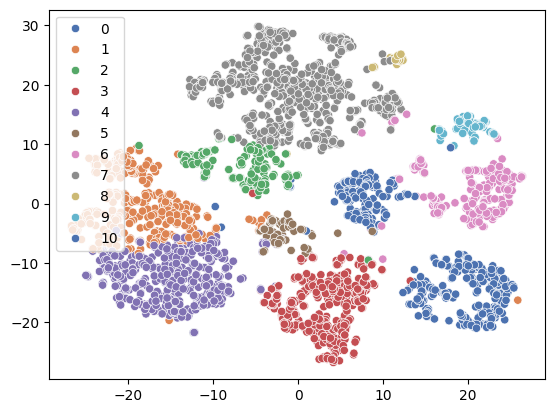

In [15]:
import seaborn as sns
sns.scatterplot(
    x=results.tsne.x, y=results.tsne.y, 
    hue=results.clusters, palette="deep"
)

or the UMAP embedding with the cell types we identified from `celldex`


<Axes: >

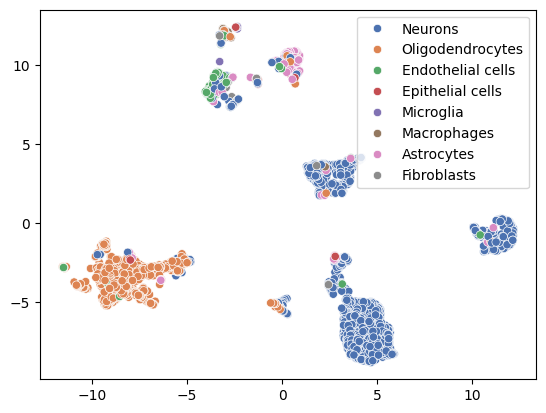

In [16]:
import seaborn as sns
sns.scatterplot(
    x=results.umap.x, y=results.umap.y, 
    hue=matches["best"][:3002], palette="deep"
)

```{caution}
During the QC step, some cells were filtered, hence we filter the matches and this is incorrect (since we don't know which cells were filtered). 

We'll leave this as an exercise for the reader to change the order of steps: 1) run the dataset through the QC step 2) filter cells, and then 3) annotate using singleR.
```

## 6. Exercises

1. Share or Upload your datasets to scrna-seq, Instructions to upload are available in their respective [R/Bioc](https://bioconductor.org/packages/release/data/experiment/html/scRNAseq.html) and [Python](https://github.com/BiocPy/scrnaseq) packages.
2. Explore top markers for each cluster identified by scranpy.
3. Perform multi-modal analysis (scranpy supports RNA, ADT, CRISPR).
4. save your results and explore in [Kana](https://github.com/kanaverse/kana).

Congratulations! You have now completed the tutorial on accessing single-cell datasets using `scRNAseq` and `ArtifactDB`, and annotating cell types using reference datasets from `celldex`. For more detailed usage and advanced analyses, refer to the respective documentation of these packages.

By integrating R and Python workflows, you can leverage the strengths of both languages and perform comprehensive single-cell analysis. Keep exploring and happy analyzing!